In [1]:
import tensorflow as tf
import os
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import random
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from skimage.color import rgb2gray  # Import the function to convert to grayscale
from keras_unet_collection import models, losses
import csv
import os
import numpy as np
import cv2


from tqdm import tqdm
from PIL import Image
from PIL import Image, ImageDraw


2023-09-14 01:27:38.030673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
# Define the path to your CSV file and where you want to save the segmentation maps
csv_file = "./data/coordinates/47-48-ilk.csv"
output_dir = "./data/segmentation_maps"

# Define the path to the image directory
image_directory = "./data/images/47-48-ilk"

TRAIN_DATA_PATH = './data/images/47-48-ilk/'  # Training original images
MASK_PATH = '././data/coordinates/47-48-ilk.csv'  # Segmentation Map

TEST_DATA_PATH = '/data/images/37-38-ilk/'

# Define the target image size
IMG_WIDTH, IMG_HEIGHT = 512, 256

# Seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

In [48]:
# Read the CSV file and process each row
with open(csv_file, "r", newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for idx, row in enumerate(reader, start=1):
        # Strip the BOM character from the 'IMAGE' field name
        image_field_name = '\ufeffIMAGE'
        filename = row[image_field_name]
        
        # Extract the image name (excluding the file extension)
        image_name = os.path.splitext(filename)[0]

        # Construct the image path
        image_path = os.path.join(image_directory, filename + ".jpg")
        
        try:
            # Open the corresponding image to get its dimensions
            img = Image.open(image_path)
            
            IMG_WIDTH, IMG_HEIGHT = img.size
            
            # Create a blank image
            segmentation_map = Image.new("L", (IMG_WIDTH, IMG_HEIGHT), 0)
            draw = ImageDraw.Draw(segmentation_map)
            
            # Extract coordinates and draw polygons on the map
            for i in range(1, 6):
                x = int(row[f"{i}-X"])
                y = int(row[f"{i}-Y"])
                draw.ellipse([(x - 5, y - 5), (x + 5, y + 5)], fill=255)

            # Save the segmentation map as an image with a unique name
            map_filename = os.path.join(output_dir, f"{image_name}-4748ilk.png")
            segmentation_map.save(map_filename)

            print(f"Saved segmentation map {idx} for {image_name} with dimensions {IMG_WIDTH}x{IMG_HEIGHT} to {map_filename}")
        except Exception as e:
            print(f"Image not found for {image_name}. Skipping.")

Saved segmentation map 1 for 17-k-27 with dimensions 2661x1343 to ./data/segmentation_maps/17-k-27-4748ilk.png
Saved segmentation map 2 for 77-k with dimensions 2619x1284 to ./data/segmentation_maps/77-k-4748ilk.png
Saved segmentation map 3 for 90-k with dimensions 2680x1315 to ./data/segmentation_maps/90-k-4748ilk.png
Saved segmentation map 4 for 111-k-48 with dimensions 2631x1300 to ./data/segmentation_maps/111-k-48-4748ilk.png
Saved segmentation map 5 for 122-e-26 with dimensions 2644x1327 to ./data/segmentation_maps/122-e-26-4748ilk.png
Saved segmentation map 6 for 133-e-45 with dimensions 2625x1302 to ./data/segmentation_maps/133-e-45-4748ilk.png
Saved segmentation map 7 for 156-k-29 with dimensions 2674x1326 to ./data/segmentation_maps/156-k-29-4748ilk.png
Saved segmentation map 8 for 160-k with dimensions 2674x1305 to ./data/segmentation_maps/160-k-4748ilk.png
Saved segmentation map 9 for 162-k with dimensions 2664x1301 to ./data/segmentation_maps/162-k-4748ilk.png
Saved segment

Saved segmentation map 82 for 925-k-25 with dimensions 2574x1233 to ./data/segmentation_maps/925-k-25-4748ilk.png
Saved segmentation map 83 for 926-e-64 with dimensions 2630x1321 to ./data/segmentation_maps/926-e-64-4748ilk.png
Saved segmentation map 84 for 928-e-22 with dimensions 2667x1330 to ./data/segmentation_maps/928-e-22-4748ilk.png
Saved segmentation map 85 for 929-k-22 with dimensions 2639x1352 to ./data/segmentation_maps/929-k-22-4748ilk.png
Saved segmentation map 86 for 931-e-47 with dimensions 2676x1342 to ./data/segmentation_maps/931-e-47-4748ilk.png
Saved segmentation map 87 for 932-k-34 with dimensions 2696x1332 to ./data/segmentation_maps/932-k-34-4748ilk.png
Saved segmentation map 88 for 933-e-66 with dimensions 2656x1354 to ./data/segmentation_maps/933-e-66-4748ilk.png
Saved segmentation map 89 for 934-k-21 with dimensions 2670x1334 to ./data/segmentation_maps/934-k-21-4748ilk.png
Saved segmentation map 90 for 935-e-17 with dimensions 2671x1330 to ./data/segmentation_

In [100]:
# Set the image dimensions
IMG_WIDTH = 512
IMG_HEIGHT = 256
IMG_CHANNELS = 1

# Define the paths
DATA_PATH = './data/images/47-48-ilk/'  # Directory containing the images
MASK_PATH = './data/segmentation_maps/'         # Segmentation map directory
OUTPUT_PATH = './data/output_segmentation_maps/'  # Output directory for saving the segmentation maps


# Seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

Resizing training images and masks


  0%|                                                                                                                                     | 0/125 [00:00<?, ?it/s]/var/folders/7z/5ztsv65j2zqb2t1y92k8lhb40000gn/T/ipykernel_64318/4243362944.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((IMG_WIDTH, IMG_HEIGHT), Image.ANTIALIAS)
/var/folders/7z/5ztsv65j2zqb2t1y92k8lhb40000gn/T/ipykernel_64318/4243362944.py:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize((IMG_WIDTH, IMG_HEIGHT), Image.ANTIALIAS)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:11<00:00, 11.07it/s]


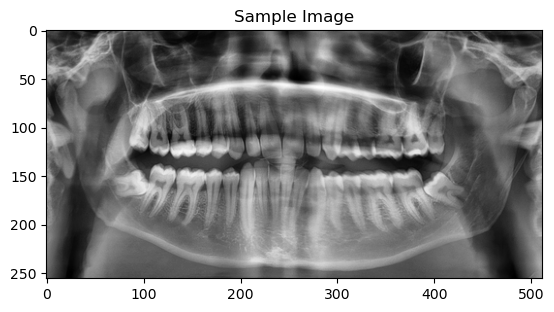

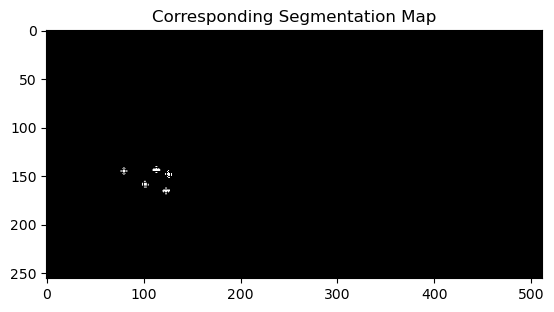

In [105]:
# Get a list of image filenames
image_ids = next(os.walk(DATA_PATH))[2]

# Initialize arrays to store images and masks
X = []
Y = []

print('Resizing training images and masks')
for n, image_filename in tqdm(enumerate(image_ids), total=len(image_ids)):
    try:
        # Load and resize the image
        img = Image.open(os.path.join(DATA_PATH, image_filename))
        img = img.resize((IMG_WIDTH, IMG_HEIGHT), Image.ANTIALIAS)

        # Convert the image to grayscale
        img = img.convert('L')
        
       
        img = np.asarray(img)
        X.append(img)

        # Load and resize the corresponding segmentation map
        mask_filename = os.path.splitext(image_filename)[0] + ".png"
        
        mask_path = os.path.join(MASK_PATH, mask_filename)
        
        if os.path.exists(mask_path):
            
            mask = Image.open(mask_path)
            mask = mask.resize((IMG_WIDTH, IMG_HEIGHT), Image.ANTIALIAS)
            mask = np.asarray(mask)
            mask = np.expand_dims(mask, axis=-1)
            Y.append(mask)
    except Exception as e:
        print(f"Error processing {image_filename}: {e}")

# Check if there are valid images and masks
if len(X) > 0 and len(Y) > 0:
    # Convert the lists to numpy arrays
    X = np.array(X, dtype=np.uint8)
    Y = np.array(Y, dtype=bool)
   
    # Display a sample image and mask
    image_x = random.randint(0, len(X) - 1)
    plt.imshow(X[image_x], cmap='gray')
    plt.title('Sample Image')
    plt.show()

    plt.imshow(np.squeeze(Y[image_x]), cmap='gray')
    plt.title('Corresponding Segmentation Map')
    plt.show()
else:
    print("No valid images and masks found.")